## Getting the required libraries

In [19]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold



import warnings

warnings.filterwarnings('ignore')

In [2]:
# load datasets
train_df = pd.read_csv('Housing_dataset_train.csv')
test_data = pd.read_csv('Housing_dataset_test.csv')
sample = pd.read_csv('Sample_submission.csv')

In [43]:
print(test_data.head())
print(test_data.shape)

      ID      loc                 title  bedroom  bathroom  parking_space
0    845     Kano             Penthouse        4         1              2
1   1924  Adamawa             Apartment        2         2              4
2  10718  Adamawa              Bungalow        2         7              2
3  12076    Lagos               Mansion        9         5              2
4  12254    Gombe  Semi-detached duplex        5         6              1
(6000, 6)


In [44]:
print(train_df.head())
print(train_df.shape)


      ID      loc                 title  bedroom  bathroom  parking_space  \
0   3583  Katsina  Semi-detached duplex      2.0       2.0            1.0   
1   2748     Ondo             Apartment      NaN       2.0            4.0   
2   9261    Ekiti                   NaN      7.0       5.0            NaN   
3   2224  Anambra       Detached duplex      5.0       2.0            4.0   
4  10300     Kogi        Terrace duplex      NaN       5.0            6.0   

         price  
0  1149999.565  
1  1672416.689  
2  3364799.814  
3  2410306.756  
4  2600700.898  
(14000, 7)


In [45]:
# overview of the variables data types showing if there is missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [6]:
# descriptive analysis
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [9]:
# checking for the total null values
train_df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

# EDA

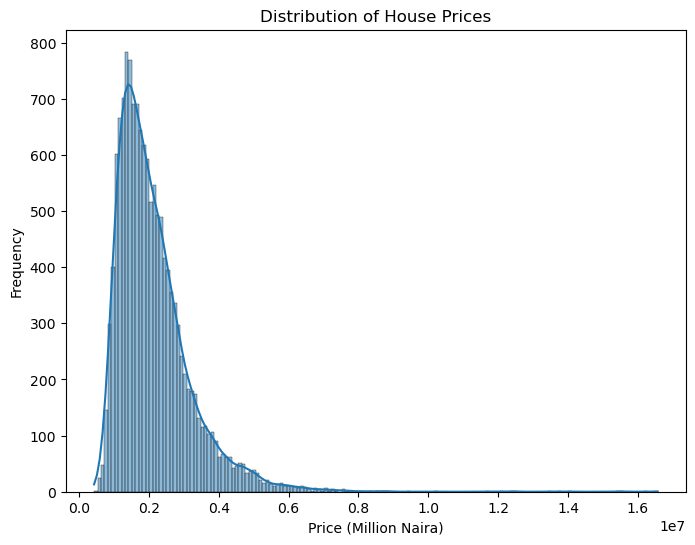

In [48]:
# Checking the distribution of the dependent variable
plt.figure(figsize=(8, 6))
sns.histplot(train_df['price'], kde=True)
plt.xlabel('Price (Million Naira)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


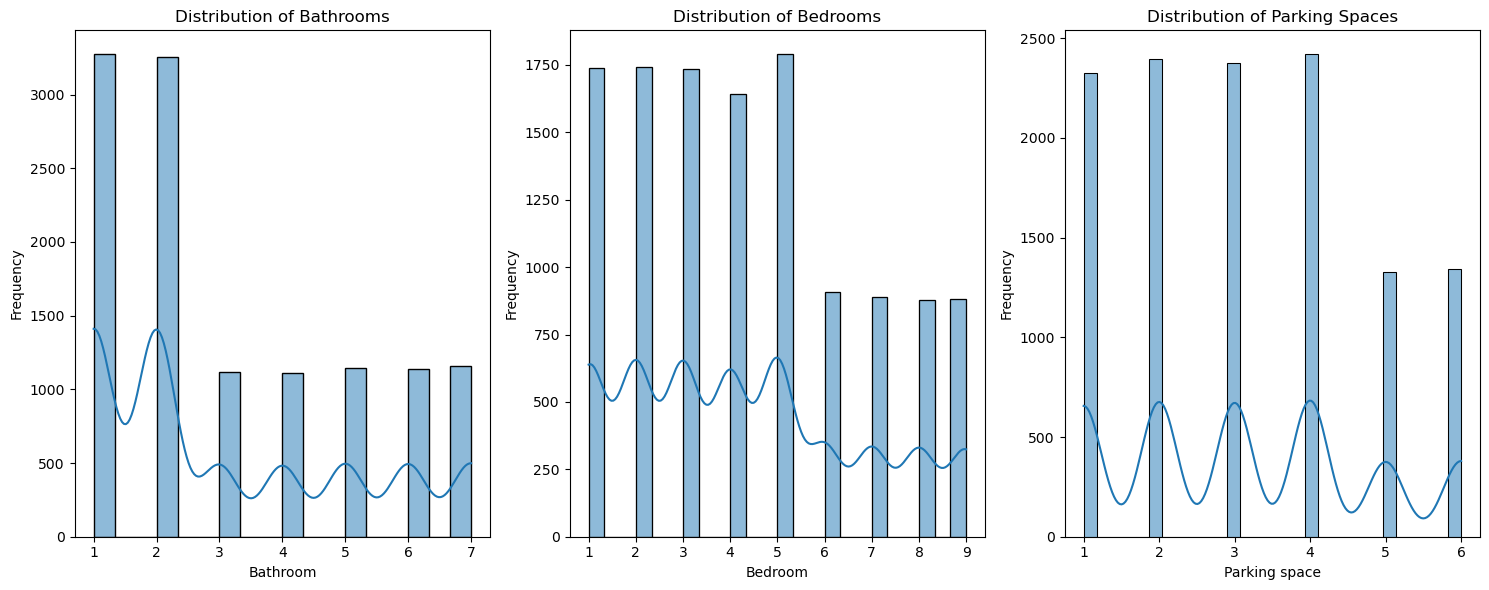

In [11]:
# checking the distribution of the numerical features

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(train_df['bathroom'], kde=True)
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.title('Distribution of Bathrooms')

plt.subplot(1, 3, 2)
sns.histplot(train_df['bedroom'], kde=True)
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')

plt.subplot(1, 3, 3)
sns.histplot(train_df['parking_space'], kde=True)
plt.xlabel('Parking space')
plt.ylabel('Frequency')
plt.title('Distribution of Parking Spaces')

plt.tight_layout()
plt.show()

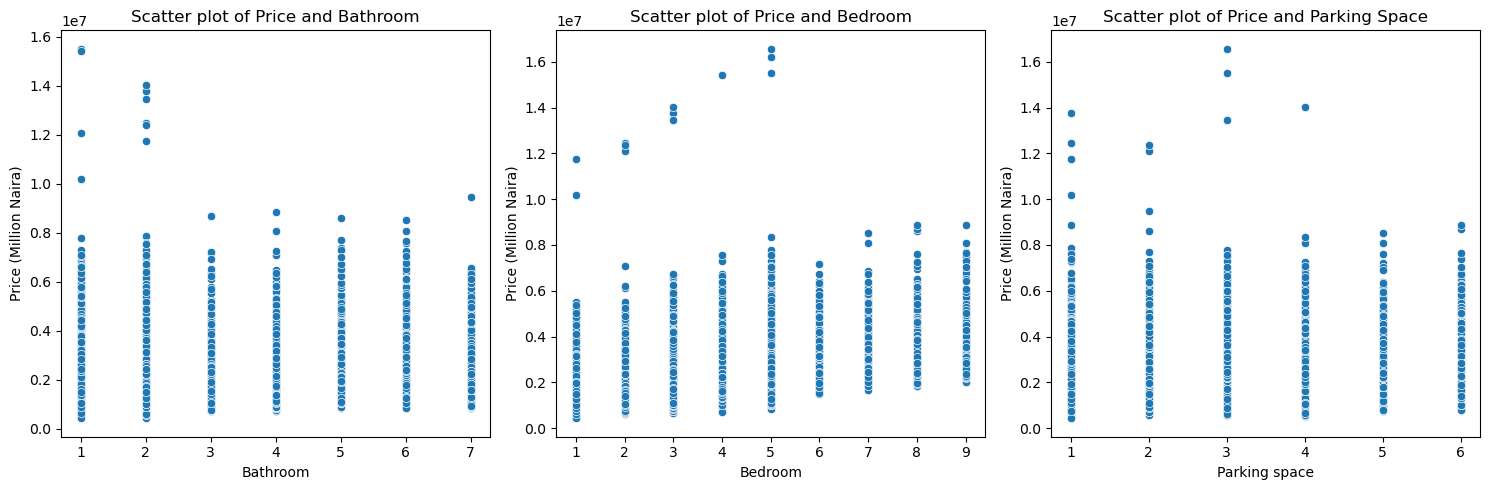

In [12]:
# checking the relationship between dependent (price) and numerical independent variable (bathroom, bedroom and parking space)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='bathroom', y='price', data=train_df)
plt.xlabel('Bathroom')
plt.ylabel('Price (Million Naira)')
plt.title('Scatter plot of Price and Bathroom')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bedroom', y='price', data=train_df)
plt.xlabel('Bedroom')
plt.ylabel('Price (Million Naira)')
plt.title('Scatter plot of Price and Bedroom')

plt.subplot(1, 3, 3)
sns.scatterplot(x='parking_space', y='price', data=train_df)
plt.xlabel('Parking space')
plt.ylabel('Price (Million Naira)')
plt.title('Scatter plot of Price and Parking Space')

plt.tight_layout()
plt.show()

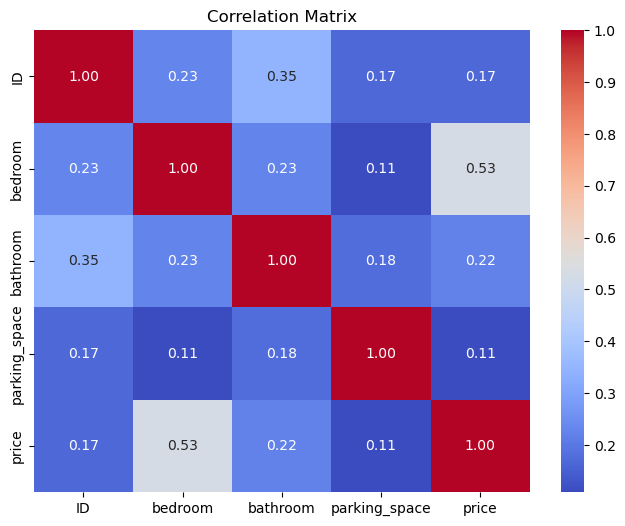

In [13]:
# Checking the correlation between dependent and independent variables
correlation_matrix = train_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



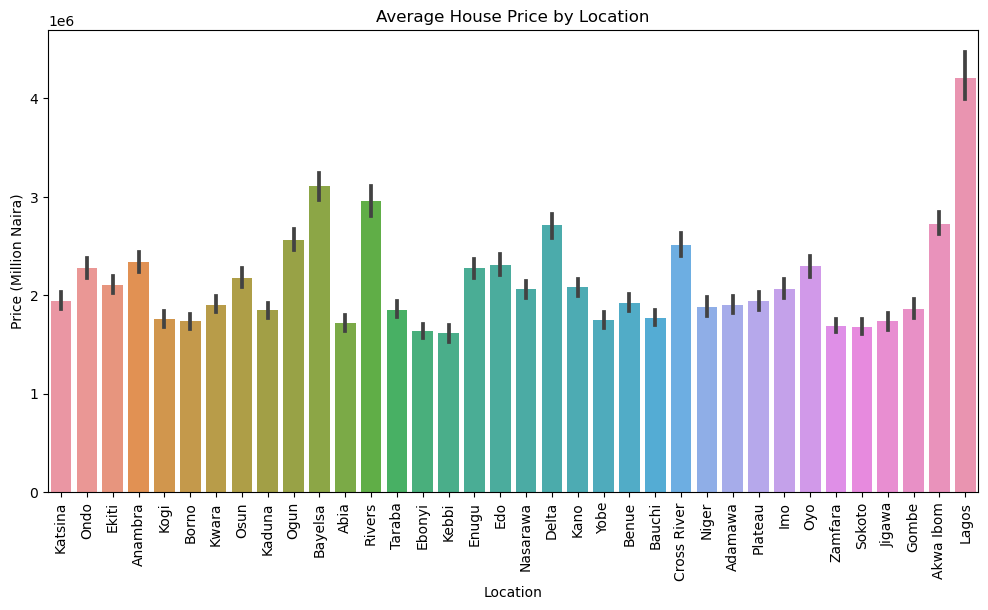

In [47]:
# Step 5: Categorical Feature Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='loc', y='price', data=train_df)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Price (Million Naira)')
plt.title('Average House Price by Location')
plt.show()



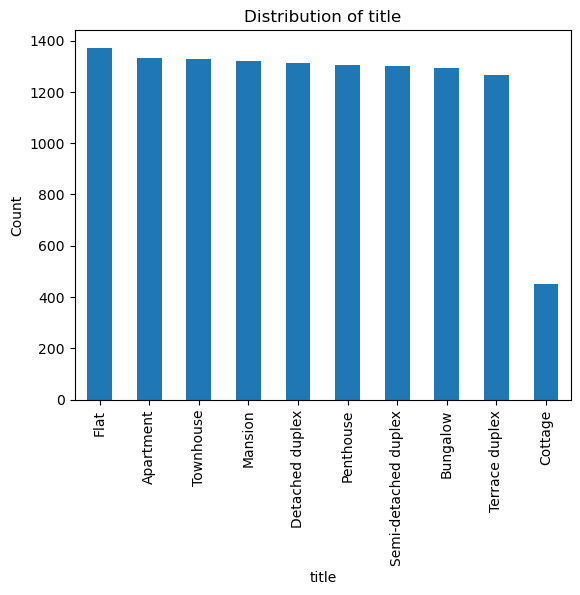

In [46]:

train_df['title'].value_counts().plot(kind='bar')
plt.xlabel('title')
plt.ylabel('Count')
plt.title('Distribution of title')
plt.show()


In [26]:
# location with the highest houses
state_with_highest_houses = train_df['loc'].value_counts().idxmax()
print(f"State with the highest number of houses: {state_with_highest_houses}")


State with the highest number of houses: Kaduna


In [28]:
# average price of houses in each state
average_price_by_state = train_df.groupby('loc')['price'].mean()
print("Average House Price in Each State:")
print(average_price_by_state)


Average House Price in Each State:
loc
Abia           1.717083e+06
Adamawa        1.905287e+06
Akwa Ibom      2.725454e+06
Anambra        2.337230e+06
Bauchi         1.772961e+06
Bayelsa        3.112322e+06
Benue          1.920461e+06
Borno          1.735704e+06
Cross River    2.507765e+06
Delta          2.712493e+06
Ebonyi         1.635850e+06
Edo            2.310452e+06
Ekiti          2.109220e+06
Enugu          2.272887e+06
Gombe          1.860851e+06
Imo            2.067489e+06
Jigawa         1.735867e+06
Kaduna         1.846993e+06
Kano           2.081931e+06
Katsina        1.947589e+06
Kebbi          1.616372e+06
Kogi           1.763416e+06
Kwara          1.903424e+06
Lagos          4.210546e+06
Nasarawa       2.061764e+06
Niger          1.885325e+06
Ogun           2.564020e+06
Ondo           2.277494e+06
Osun           2.180570e+06
Oyo            2.293159e+06
Plateau        1.942316e+06
Rivers         2.957098e+06
Sokoto         1.681016e+06
Taraba         1.855306e+06
Yobe     

In [29]:
# House type with the highest average number of bathroom
house_type_highest_avg_bathrooms = train_df.groupby('title')['bathroom'].mean().idxmax()
print(f"House type with the highest average number of bathrooms: {house_type_highest_avg_bathrooms}")


House type with the highest average number of bathrooms: Bungalow


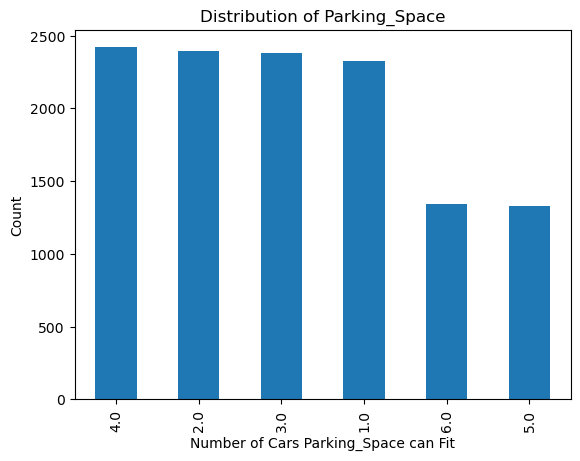

In [30]:
# Number of Cars Parking_Space can Fit:

train_df['parking_space'].value_counts().plot(kind='bar')
plt.xlabel('Number of Cars Parking_Space can Fit')
plt.ylabel('Count')
plt.title('Distribution of Parking_Space')
plt.show()


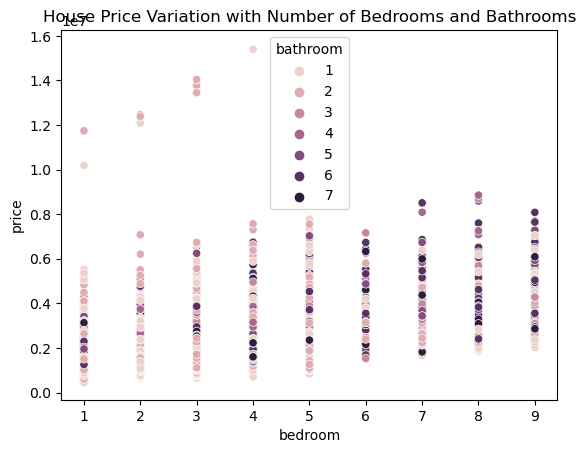

In [31]:
#
sns.scatterplot(data=train_df, x='bedroom', y='price', hue='bathroom')
plt.title('House Price Variation with Number of Bedrooms and Bathrooms')
plt.show()

In [33]:
# Significant Difference in House Prices Between Different States (using ANOVA or Kruskal-Wallis Test):

from scipy.stats import f_oneway

state_groups = [train_df[train_df['loc'] == state]['price'] for state in train_df['loc'].unique()]
anova_result = f_oneway(*state_groups)

if anova_result.pvalue < 0.05:
    print("There is a significant difference in house prices between different states.")
else:
    print("There is no significant difference in house prices between different states.")


There is no significant difference in house prices between different states.


In [35]:
# State with the highest median house price
highest_median_price_state = train_df.groupby('loc')['price'].median().idxmax()
print(f"State with the highest median house price: {highest_median_price_state}")


State with the highest median house price: Lagos


In [36]:
# Top 5 most expensive house types:


top_5_expensive_house_types = train_df.groupby('title')['price'].mean().nlargest(5)
print("Top 5 most expensive house types:")
print(top_5_expensive_house_types)


Top 5 most expensive house types:
title
Mansion            3.725768e+06
Penthouse          2.628945e+06
Detached duplex    2.205883e+06
Townhouse          2.056125e+06
Terrace duplex     1.927270e+06
Name: price, dtype: float64


In [37]:
# Correlation between number of bedrooms and number of bathrooms
correlation = train_df[['bedroom', 'bathroom']].corr().iloc[0, 1]
print(f"Correlation between number of bedrooms and number of bathrooms: {correlation}")


Correlation between number of bedrooms and number of bathrooms: 0.22741748949498652


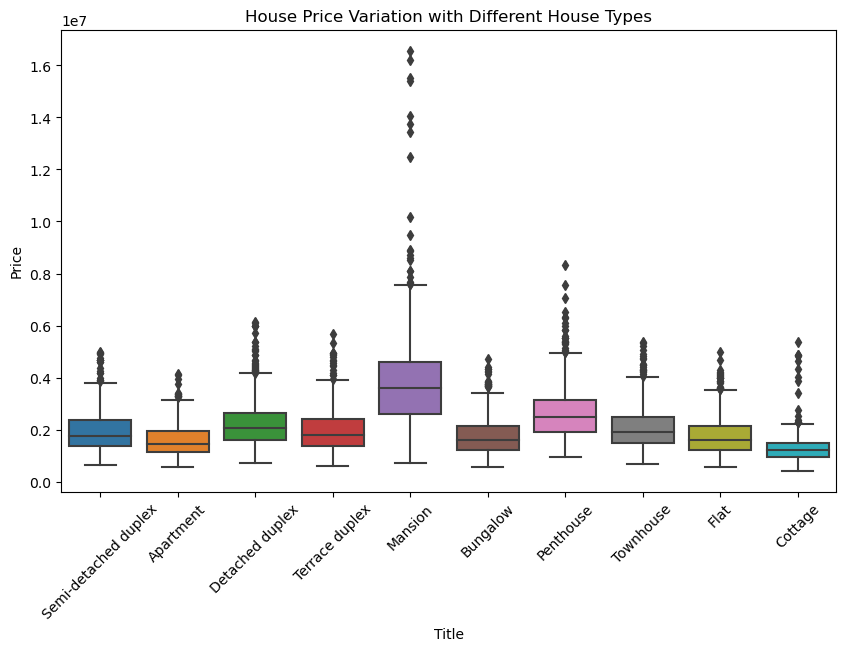

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='title', y='price')
plt.xticks(rotation=45)
plt.xlabel('Title')
plt.ylabel('Price')
plt.title('House Price Variation with Different House Types')
plt.show()


In [40]:
average_bedrooms_by_house_type = train_df.groupby('title')['bedroom'].mean()
print("Average number of bedrooms for each house type:")
print(average_bedrooms_by_house_type)


Average number of bedrooms for each house type:
title
Apartment               4.344219
Bungalow                4.402852
Cottage                 2.905512
Detached duplex         4.327840
Flat                    4.378877
Mansion                 4.333929
Penthouse               4.342982
Semi-detached duplex    4.414903
Terrace duplex          4.340639
Townhouse               4.298759
Name: bedroom, dtype: float64


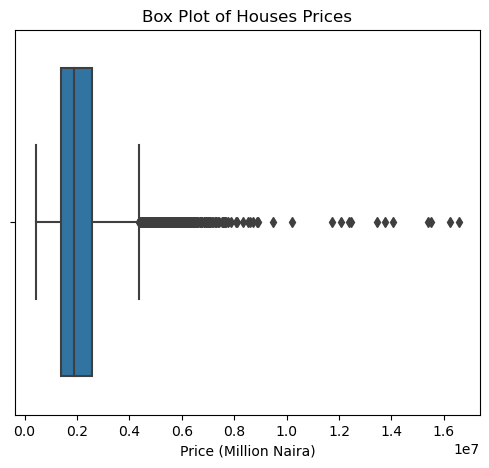

In [49]:
# Checking for Outliers in the dependent variable
plt.figure(figsize=(6, 5))
sns.boxplot(train_df['price'])
plt.xlabel('Price (Million Naira)')
plt.title('Box Plot of Houses Prices')
plt.show()

## Feature Engineering

In [22]:
# combined train and test data together in preparation for feature engineering
data = train_df.append(test_data)

In [6]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0
1,2748,Ondo,Apartment,NaN,2.0,4.0
2,9261,Ekiti,NaN,7.0,5.0,NaN
3,2224,Anambra,Detached duplex,5.0,2.0,4.0
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0


In [50]:
group = data.groupby(['loc', 'title'])['price'].agg(['median','mean','max','min']).reset_index()
group.rename(columns = {'median':'Median_Price', 'mean': 'Mean_Price', 'max':'Maximum_Price', 'min':'Minimum_Price'})

,loc,title,Median_Price,Mean_Price,Maximum_Price,Minimum_Price
0,Abia,Apartment,1.217831e+06,1.307904e+06,2167935.769,7.237325e+05
1,Abia,Bungalow,1.341707e+06,1.380416e+06,2389565.761,8.333061e+05
2,Abia,Cottage,9.290516e+05,9.241519e+05,1508207.866,6.061964e+05
3,Abia,Detached duplex,1.730198e+06,1.767214e+06,2921349.304,1.035684e+06
4,Abia,Flat,1.370163e+06,1.530552e+06,2407783.804,8.306085e+05
...,...,...,...,...,...,...
355,Zamfara,Mansion,2.772033e+06,2.761524e+06,4390262.659,1.085265e+06
356,Zamfara,Penthouse,1.853092e+06,1.940600e+06,3204954.871,1.462267e+06
357,Zamfara,Semi-detached duplex,1.460792e+06,1.479472e+06,2517828.287,8.387324e+05
358,Zamfara,Terrace duplex,1.459717e+06,1.588152e+06,2558818.882,9.513125e+05


In [51]:
data = pd.merge(data, group, on = ['loc','title'], how = 'left')

In [11]:
# Assuming you have a DataFrame named df containing the features 'Bathroom' and 'Bedroom'
data['Bathroom_Bedroom_Ratio'] = data['bathroom'] / data['bedroom']
# test_data['Bathroom_Bedroom_Ratio'] = test_data['bathroom'] / test_data['bedroom']


data['Has_Parking'] = data['parking_space'].apply(lambda space: 1 if space > 0 else 0)
# test_data['Has_Parking'] = test_data['parking_space'].apply(lambda space: 1 if space > 0 else 0)


# Assuming you have a DataFrame named df containing the feature 'Location' with the state names

# Define the mapping of states to regions
state_to_region = {
    'Lagos': 'South-West',
    'Ogun': 'South-West',
    'Oyo': 'South-West',
    'Osun': 'South-West',
    'Ondo': 'South-West',
    'Ekiti': 'South-West',
    'Kwara': 'North-Central',
    'Kogi': 'North-Central',
    'Benue': 'North-Central',
    'Nasarawa': 'North-Central',
    'Plateau': 'North-Central',
    'Niger': 'North-Central',
    'FCT': 'North-Central',
    'Kano': 'North-West',
    'Kaduna': 'North-West',
    'Jigawa': 'North-West',
    'Katsina': 'North-West',
    'Kebbi': 'North-West',
    'Sokoto': 'North-West',
    'Zamfara': 'North-West',
    'Yobe': 'North-East',
    'Borno': 'North-East',
    'Bauchi': 'North-East',
    'Adamawa': 'North-East',
    'Gombe': 'North-East',
    'Taraba': 'North-East',
    'Akwa Ibom': 'South-South',
    'Cross River': 'South-South',
    'Rivers': 'South-South',
    'Delta': 'South-South',
    'Edo': 'South-South',
    'Bayelsa': 'South-South',
    'Abia': 'South-East',
    'Imo': 'South-East',
    'Enugu': 'South-East',
    'Anambra': 'South-East',
    'Ebonyi': 'South-East',
}

# Create a new column 'Region' by mapping the states to their respective regions
data['Region'] = data['loc'].map(state_to_region)
# test_data['Region'] = test_data['loc'].map(state_to_region)


In [12]:
data['Region'].value_counts()

North-West       3587
South-West       3079
North-East       3067
North-Central    3025
South-South      2923
South-East       2506
Name: Region, dtype: int64

In [11]:
data

,ID,loc,title,bedroom,bathroom,parking_space,price,median,mean,max,min,Bathroom_Bedroom_Ratio,Region
0,3583,0.028592,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.478502e+06,1.633305e+06,2881940.087,1.024414e+06,1.000000,2
1,2748,0.028097,Apartment,NaN,2.0,4.0,1672416.689,1.456570e+06,1.475134e+06,2723312.035,9.585080e+05,NaN,5
2,9261,0.027822,NaN,7.0,5.0,NaN,3364799.814,NaN,NaN,NaN,NaN,0.714286,5
3,2224,0.029856,Detached duplex,5.0,2.0,4.0,2410306.756,2.074056e+06,2.197157e+06,3643458.720,1.444892e+06,0.400000,3
4,10300,0.027382,Terrace duplex,NaN,5.0,6.0,2600700.898,1.840870e+06,1.763966e+06,2788247.299,8.768941e+05,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1594,0.027822,Flat,4.0,5.0,2.0,NaN,1.707106e+06,1.849615e+06,2881940.087,9.839040e+05,1.250000,5
19996,2416,0.028372,Terrace duplex,5.0,7.0,1.0,NaN,1.561971e+06,1.650926e+06,2881940.087,9.736095e+05,1.400000,1
19997,10195,0.028812,Townhouse,4.0,1.0,4.0,NaN,1.937431e+06,2.118825e+06,3413964.596,1.331875e+06,0.250000,5
19998,9455,0.028427,Flat,3.0,7.0,5.0,NaN,1.461717e+06,1.587503e+06,2325720.431,8.563957e+05,2.333333,1


### Encoding

In [13]:
# encoding the loc variable
cat_frequencies = data['loc'].value_counts(normalize=True)
loc_freq_mapping = cat_frequencies.to_dict()
data['loc'] = data['loc'].map(loc_freq_mapping)


In [14]:
# encoding region
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])


In [15]:
# encoding title

category_mapping = {'Mansion': 10, 'Penthouse':9, 'Detached duplex':8, 'Semi-detached duplex':7, 'Townhouse':6, 'Terrace duplex':5, 'Cottage': 4, 'Apartment':3, 'Flat':2,'Bungalow':1 }
data['title'] = data['title'].map(category_mapping)


In [12]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,median,mean,max,min,Bathroom_Bedroom_Ratio,Region
0,3583,0.028592,7.0,2.0,2.0,1.0,1149999.565,1478501.671,1.633305e+06,2881940.087,1.024414e+06,1.000000,2
1,2748,0.028097,3.0,NaN,2.0,4.0,1672416.689,1456570.352,1.475134e+06,2723312.035,9.585080e+05,NaN,5
2,9261,0.027822,NaN,7.0,5.0,NaN,3364799.814,NaN,NaN,NaN,NaN,0.714286,5
3,2224,0.029856,8.0,5.0,2.0,4.0,2410306.756,2074056.399,2.197157e+06,3643458.720,1.444892e+06,0.400000,3
4,10300,0.027382,5.0,NaN,5.0,6.0,2600700.898,1840869.981,1.763966e+06,2788247.299,8.768941e+05,NaN,0


In [16]:
data.drop(['price'], axis =1, inplace =True)

# Modelling

In [17]:
X = data[:df.shape[0]]
y = df.price


In [18]:
test = data[df.shape[0]:]

In [19]:
X

,ID,loc,title,bedroom,bathroom,parking_space,median,mean,max,min,Bathroom_Bedroom_Ratio,Has_Parking,Region
0,3583,0.028592,7.0,2.0,2.0,1.0,1.478502e+06,1.633305e+06,2881940.087,1.024414e+06,1.000000,1,2
1,2748,0.028097,3.0,NaN,2.0,4.0,1.456570e+06,1.475134e+06,2723312.035,9.585080e+05,NaN,1,5
2,9261,0.027822,NaN,7.0,5.0,NaN,NaN,NaN,NaN,NaN,0.714286,0,5
3,2224,0.029856,8.0,5.0,2.0,4.0,2.074056e+06,2.197157e+06,3643458.720,1.444892e+06,0.400000,1,3
4,10300,0.027382,5.0,NaN,5.0,6.0,1.840870e+06,1.763966e+06,2788247.299,8.768941e+05,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,6175,0.025678,1.0,NaN,7.0,NaN,1.882432e+06,1.908787e+06,2714120.529,1.080504e+06,NaN,0,4
13996,9704,0.029472,3.0,NaN,7.0,5.0,1.395381e+06,1.447041e+06,2398756.965,9.067719e+05,NaN,1,2
13997,11190,0.027327,1.0,8.0,6.0,5.0,1.418016e+06,1.614797e+06,2543959.237,8.928880e+05,0.750000,1,0
13998,9256,0.027162,2.0,NaN,6.0,1.0,1.773535e+06,1.971174e+06,3348918.718,1.340703e+06,NaN,1,4


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
xg_regressor = XGBRegressor()
gb_regressor = GradientBoostingRegressor()
lg_regressor = LGBMRegressor()
cb_regressor = CatBoostRegressor()


In [25]:

# Define a grid of hyperparameters to search through
param_grid = {
   'n_estimators': [500,700,650,800,1000],
    'colsample_bytree': [0.84],
 'learning_rate': [0.032],
 'max_depth': [7],
 'subsample': [0.85],
    'min_child_samples': [5],
'num_leaves': [10, 20, 30]
}


grid_search = GridSearchCV(estimator=lg_regressor, param_grid=param_grid, cv=5,scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
# grid_search.fit(X_scaled, y)
grid_search.fit(X, y)



# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 14000, number of used features: 13
[LightGBM] [Info] Start training from score 2138081.749330
Best Hyperparameters: {'colsample_bytree': 0.84, 'learning_rate': 0.032, 'max_depth': 7, 'min_child_samples': 5, 'n_estimators': 650, 'num_leaves': 10, 'subsample': 0.85}


### Catboost tuning

In [29]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
cb_regressor = CatBoostRegressor()

# Define the hyperparameter search space
param_dist_cat = {
    'iterations': [100, 200, 300, 500],       # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'depth': [3, 5, 7, 9],                    # Depth of trees
    'l2_leaf_reg': [1, 3, 5, 7],              # L2 regularization coefficient
}

# Perform RandomizedSearchCV
random_search_cat = RandomizedSearchCV(cb_regressor, param_distributions=param_dist_cat, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_cat.fit(X, y)

# Get the best hyperparameters
best_params_cat = random_search_cat.best_params_
print("Best Hyperparameters for CatBoost:", best_params_cat)


0:	learn: 1055083.0477926	total: 147ms	remaining: 1m 13s
1:	learn: 1027615.1400222	total: 151ms	remaining: 37.7s
2:	learn: 1002170.0634968	total: 155ms	remaining: 25.7s
3:	learn: 978058.9766114	total: 160ms	remaining: 19.8s
4:	learn: 955055.8470820	total: 164ms	remaining: 16.2s
5:	learn: 932773.2131741	total: 168ms	remaining: 13.8s
6:	learn: 913226.2252383	total: 172ms	remaining: 12.1s
7:	learn: 894039.2255472	total: 176ms	remaining: 10.8s
8:	learn: 875242.1814565	total: 180ms	remaining: 9.85s
9:	learn: 859679.7842293	total: 185ms	remaining: 9.05s
10:	learn: 843317.0619376	total: 189ms	remaining: 8.39s
11:	learn: 828659.4874281	total: 193ms	remaining: 7.85s
12:	learn: 814252.2229443	total: 197ms	remaining: 7.37s
13:	learn: 800927.3842357	total: 201ms	remaining: 6.96s
14:	learn: 788086.9239861	total: 205ms	remaining: 6.62s
15:	learn: 777039.8710201	total: 208ms	remaining: 6.3s
16:	learn: 765788.2809184	total: 212ms	remaining: 6.02s
17:	learn: 755926.1389277	total: 216ms	remaining: 5.78s

156:	learn: 509356.6822498	total: 751ms	remaining: 1.64s
157:	learn: 509124.6686332	total: 755ms	remaining: 1.63s
158:	learn: 508348.9774815	total: 759ms	remaining: 1.63s
159:	learn: 508144.0613556	total: 763ms	remaining: 1.62s
160:	learn: 507920.6702332	total: 767ms	remaining: 1.61s
161:	learn: 507626.8550747	total: 771ms	remaining: 1.61s
162:	learn: 507461.6566187	total: 775ms	remaining: 1.6s
163:	learn: 507226.2844525	total: 779ms	remaining: 1.6s
164:	learn: 506889.9987586	total: 783ms	remaining: 1.59s
165:	learn: 506706.0729780	total: 787ms	remaining: 1.58s
166:	learn: 506562.2486273	total: 792ms	remaining: 1.58s
167:	learn: 506320.5023509	total: 796ms	remaining: 1.57s
168:	learn: 506120.8119845	total: 800ms	remaining: 1.57s
169:	learn: 505768.9177567	total: 804ms	remaining: 1.56s
170:	learn: 505550.8741548	total: 808ms	remaining: 1.55s
171:	learn: 505431.4560372	total: 813ms	remaining: 1.55s
172:	learn: 505216.9102739	total: 817ms	remaining: 1.54s
173:	learn: 504890.0043296	total:

327:	learn: 475759.1654829	total: 1.35s	remaining: 707ms
328:	learn: 475702.7136087	total: 1.35s	remaining: 703ms
329:	learn: 475587.5585123	total: 1.35s	remaining: 698ms
330:	learn: 475441.5771075	total: 1.36s	remaining: 693ms
331:	learn: 475110.7745546	total: 1.36s	remaining: 689ms
332:	learn: 474909.4804036	total: 1.36s	remaining: 684ms
333:	learn: 474835.5302265	total: 1.37s	remaining: 680ms
334:	learn: 474764.1043569	total: 1.37s	remaining: 675ms
335:	learn: 474642.9907253	total: 1.37s	remaining: 671ms
336:	learn: 474512.2956072	total: 1.38s	remaining: 666ms
337:	learn: 474409.2516484	total: 1.38s	remaining: 663ms
338:	learn: 474307.0180899	total: 1.39s	remaining: 659ms
339:	learn: 474167.6108821	total: 1.39s	remaining: 654ms
340:	learn: 473814.7525022	total: 1.39s	remaining: 650ms
341:	learn: 473747.8535597	total: 1.4s	remaining: 645ms
342:	learn: 473656.7039118	total: 1.4s	remaining: 641ms
343:	learn: 473595.2716370	total: 1.4s	remaining: 637ms
344:	learn: 473503.4513759	total: 

487:	learn: 458190.3675012	total: 1.94s	remaining: 47.8ms
488:	learn: 458135.7001156	total: 1.95s	remaining: 43.8ms
489:	learn: 458044.9992637	total: 1.95s	remaining: 39.8ms
490:	learn: 457928.0922796	total: 1.96s	remaining: 35.8ms
491:	learn: 457876.1524384	total: 1.96s	remaining: 31.9ms
492:	learn: 457813.2877868	total: 1.96s	remaining: 27.9ms
493:	learn: 457754.9831427	total: 1.97s	remaining: 23.9ms
494:	learn: 457692.5308849	total: 1.97s	remaining: 19.9ms
495:	learn: 457569.4383392	total: 1.98s	remaining: 15.9ms
496:	learn: 457531.7514164	total: 1.98s	remaining: 12ms
497:	learn: 457391.1820905	total: 1.98s	remaining: 7.97ms
498:	learn: 457265.5331637	total: 1.99s	remaining: 3.98ms
499:	learn: 457176.0028668	total: 1.99s	remaining: 0us
Best Hyperparameters for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 5}


In [30]:

# Define the model
xg_regressor = XGBRegressor()

# Define the hyperparameter search space
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],      # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Learning rate
    'max_depth': [3, 5, 7, 9],                 # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],              # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],       # Subsample ratio of columns when building trees
}

# Perform RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xg_regressor, param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_xgb.fit(X, y)

# Get the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
print("Best Hyperparameters for XGBoost:", best_params_xgb)


Best Hyperparameters for XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [47]:
xgb_fold_pred=[]
xgb_oof_pred = []

fold = KFold(n_splits=10, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    # XGBoost
    model_xgb = XGBRegressor(**best_params_xgb)
    model_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

    preds_xgb = model_xgb.predict(X_test)
    print("XGBoost RMSE: ", mean_squared_error(y_test, preds_xgb ** 2, squared=False))
    xgb_oof_pred.append(mean_squared_error(y_test,preds_xgb**2,squared=False))
    xgb_p2 = model_xgb.predict(test[X.columns])
    xgb_fold_pred.append(xgb_p2**2)
    
print(np.mean(xgb_oof_pred))

XGBoost RMSE:  543935.6872004847
XGBoost RMSE:  467052.6996091042
XGBoost RMSE:  552520.9716663129
XGBoost RMSE:  545165.6630820892
XGBoost RMSE:  685693.3070415853
XGBoost RMSE:  448735.12619873445
XGBoost RMSE:  521655.21845995245
XGBoost RMSE:  517168.36913301545
XGBoost RMSE:  458908.0952257984
XGBoost RMSE:  577881.4753693324
531871.6612986409


In [48]:
cb_fold_pred=[]
cb_oof_pred = []

fold = KFold(n_splits=10, shuffle=True)
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model_cat = CatBoostRegressor(**best_params_cat)
    model_cat.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

    preds_cat = model_cat.predict(X_test)
    print("CatBoost RMSE: ", mean_squared_error(y_test, preds_cat ** 2, squared=False))
    cb_oof_pred.append(mean_squared_error(y_test,preds_cat**2,squared=False))
    cb_p2 = model.predict(test[X.columns])
    cb_fold_pred.append(cb_p2**2)

print(np.mean(cb_oof_pred))

CatBoost RMSE:  432604.55029693333
CatBoost RMSE:  591993.2502034435
CatBoost RMSE:  531401.6526935623
CatBoost RMSE:  534739.5965409606
CatBoost RMSE:  573976.4396096723
CatBoost RMSE:  604915.6885575348
CatBoost RMSE:  521696.62579812185
CatBoost RMSE:  540593.9178594147
CatBoost RMSE:  498944.96116822667
CatBoost RMSE:  434920.16780268645
526578.6850530558


In [50]:

lg_fold_pred=[]
lg_oof_pred = []


fold = KFold(n_splits=10, shuffle=True)
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.sqrt(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**best_params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])

    preds_lgb= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,preds_lgb**2, squared=False)))  
    lg_oof_pred.append(mean_squared_error(y_test,preds_lgb**2,squared=False))
    lg_p2 = model.predict(test[X.columns])
    lg_fold_pred.append(lg_p2**2)
    

  
    
print(np.mean(lg_oof_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 12600, number of used features: 13
[LightGBM] [Info] Start training from score 1424.256304
err:  478557.2244980424
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 12600, number of used features: 13
[LightGBM] [Info] Start training from score 1423.749994
err:  455489.0776569108
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set:

In [54]:
lg_fold_pred = np.array(lg_fold_pred)
cb_fold_pred = np.array(cb_fold_pred)
xgb_fold_pred = np.array(xgb_fold_pred)

In [65]:
average_pred = (lg_fold_pred*0.5) + (cb_fold_pred*0.3) +(xgb_fold_pred*0.2)

In [66]:
average_pred

array([[2181372.89687028,  968449.22429628, 1183212.84939553, ...,
        2066970.65106756, 1356536.05522736, 3230967.84787852],
       [2185985.89135215,  973564.59607084, 1188714.15311023, ...,
        2062539.3071753 , 1365292.26876246, 3220438.98853988],
       [2186483.04007734,  968355.93459349, 1183733.16982657, ...,
        2052490.55703093, 1382129.10875246, 3237067.55747138],
       ...,
       [2194464.36506506,  981857.55333744, 1177620.07524673, ...,
        2068101.13318763, 1361743.17602931, 3245951.91863842],
       [2201975.39172836,  978200.58210621, 1171980.68501603, ...,
        2061676.31944363, 1367165.92885919, 3256433.50971219],
       [2168751.16780417,  973946.72466661, 1186415.48001292, ...,
        2081775.21973876, 1355964.67476369, 3259984.14249698]])

In [67]:
sample['price'] = np.mean(average_pred, axis = 0)
sample.head()

,ID,price
0,845,2.196613e+06
1,1924,9.747362e+05
2,10718,1.181339e+06
3,12076,8.331173e+06
4,12254,1.885297e+06


In [68]:
sample.to_csv('price_pred7.csv', index = False)

Text(0.5, 1.0, 'CatboostClassifier features importance (top 50):')

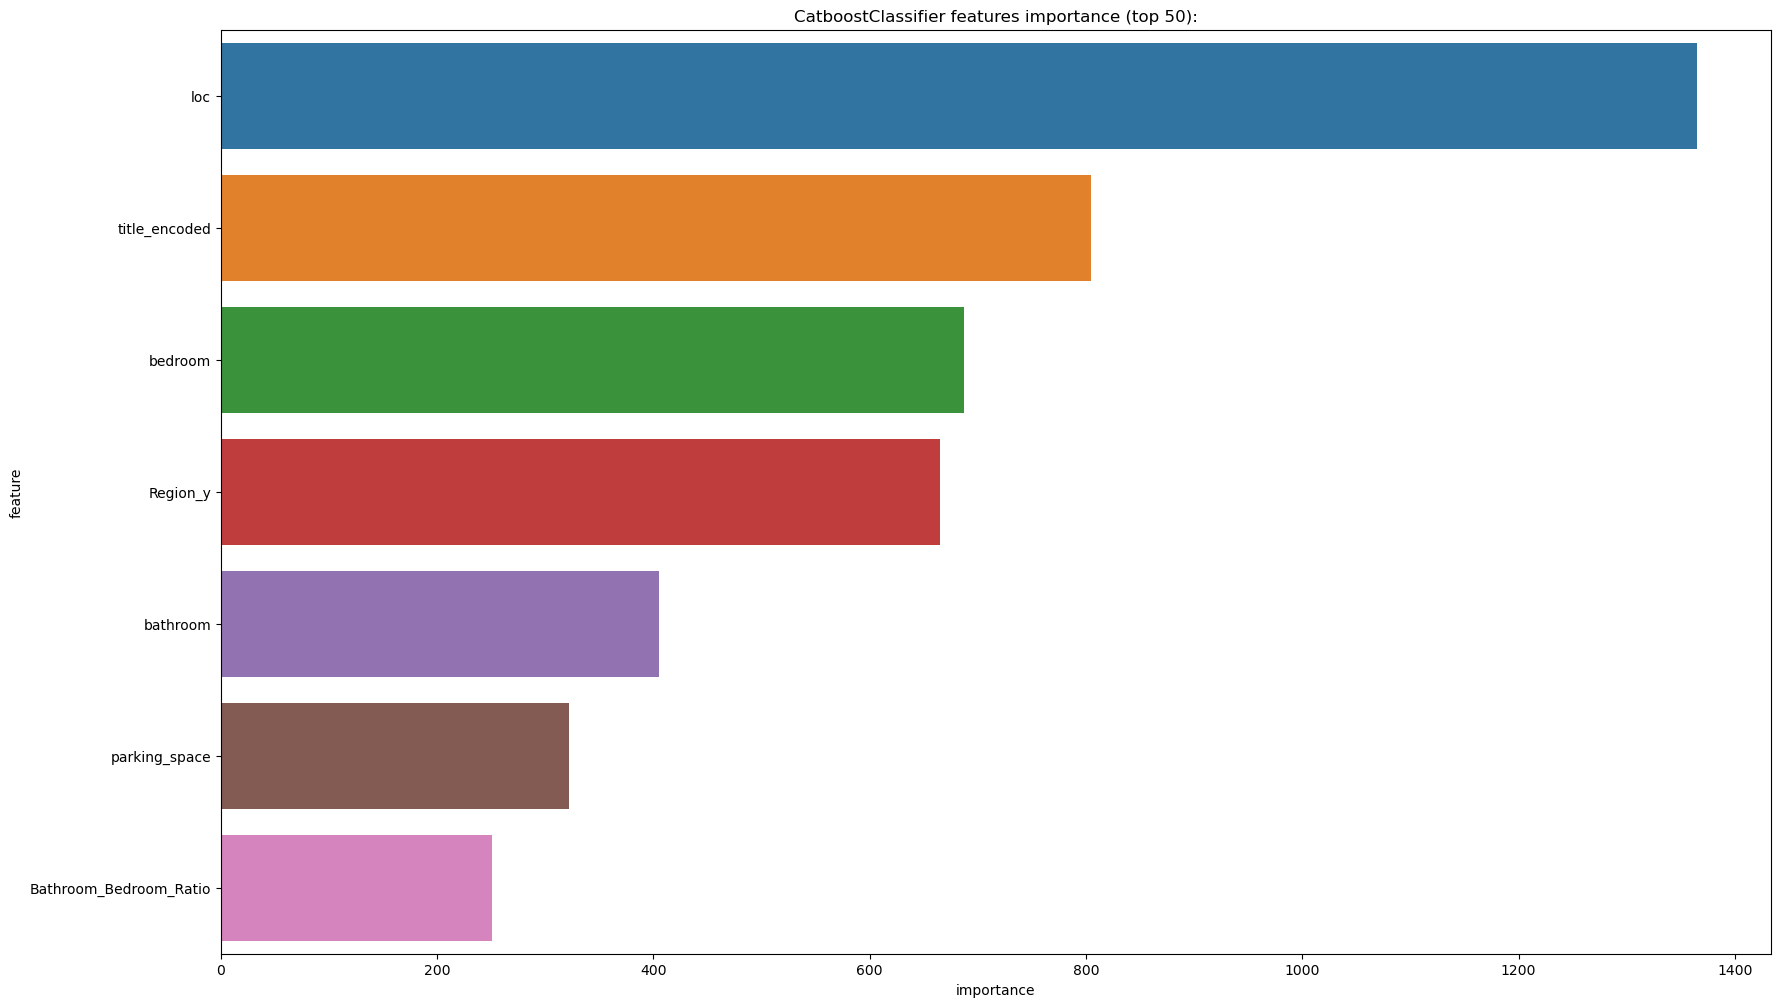

In [21]:

feature_import = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_import['feature'] = X.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_import.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('CatboostClassifier features importance (top 50):')